<a href="https://colab.research.google.com/github/zainamri/tengoknijelah/blob/main/SeoulBikeFiks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Business Understanding (Pemahaman Bisnis)**
Urbanisasi dan peningkatan populasi di kota-kota besar seperti Seoul menimbulkan kebutuhan mendesak akan solusi transportasi yang efisien dan ramah lingkungan. Sistem penyewaan sepeda publik menjadi alternatif populer untuk mengurangi kemacetan lalu lintas, menurunkan emisi karbon, dan meningkatkan kesehatan masyarakat. Namun, penyedia layanan menghadapi tantangan dalam mengestimasi permintaan penyewaan sepeda di masa mendatang berdasarkan data historis. Estimasi yang tidak akurat dapat menyebabkan kekurangan atau kelebihan stok sepeda, yang mengurangi kualitas layanan dan meningkatkan biaya operasional.

Analisis ini bertujuan mengembangkan model klasifikasi untuk memprediksi apakah jumlah sepeda yang disewa pada suatu waktu tertentu berada di atas atau di bawah ambang batas tertentu berdasarkan berbagai faktor cuaca dan non-cuaca. Model ini akan membantu pengelola mengantisipasi permintaan sepeda, mengalokasikan sumber daya secara efektif, dan meningkatkan kepuasan pengguna.

Manfaat diharapkan proyek yang dibuat dapat membantu bagi Penyedia Layanan dalam memahami wawasan untuk mengoptimalkan pengelolaan stok sepeda dan meningkatkan kualitas layanan. Dan bagi Masyarakat dapat meningkatkan ketersediaan dan kenyamanan penggunaan layanan penyewaan sepeda.

Pertanyaan Bisnis
Penelitian ini bertujuan untuk menjawab beberapa pertanyaan bisnis yang krusial, yaitu:
1.	Faktor-faktor apa saja yang paling mempengaruhi jumlah sepeda yang disewa?
2.	Bagaimana kondisi cuaca seperti suhu, kelembaban, dan kecepatan angin mempengaruhi jumlah penyewaan sepeda?
3.	Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda pada hari kerja dibandingkan dengan hari libur atau musim tertentu?
4.	Bisakah kita memprediksi dengan akurat jumlah penyewaan sepeda berdasarkan data historis dan kondisi cuaca saat ini?


# **Data Undersstanding**

# 2.1. Pengumpulan Data
Penelitian ini menggunakan dataset dari kaggle [SeoulBikeDataset](https://www.kaggle.com/datasets/sadikaljarif/seoul-bike-sharing-demand)

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

Import beberapa library yang akan di gunakan

In [74]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


drive.mount code ini bertujuan untuk mengakses atau menghubungkan Google Drive yang digunakan dalam penyimpanan dengan lingkungan Colab yang akan di pergunakan.

In [75]:
#Melakukan import dataset "Seoul Bike".
# Baca dataset
df = pd.read_csv("/content/drive/MyDrive/dataset/SeoulBikeData.csv", encoding='latin-1') # Try 'latin-1' encoding
# If 'latin-1' doesn't work, you may need to experiment with other encodings like 'ISO-8859-1'

- Mengimpor Data : Membaca data dari file CSV ke dalam DataFrame df, yang memudahkan manipulasi dan analisis data menggunakan library pandas.
- Penggunaan encoding 'latin-1' memastikan bahwa file CSV dengan karakter khusus dapat dibaca tanpa kesalahan.


# 2.2 Pemahaman Struktur data, Evaluasi Integritas data, dan Identifikasi Hubungan Antar Variabel

In [76]:
# Menampilkan beberapa baris pertama dari dataset
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [77]:
# Menampilkan struktur dataset
print("\nStruktur dataset:")
df.info()


Struktur dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            87

Deskripsi:
1. Date: Kolom ini berisi data tanggal dalam format string.
2. Rented Bike Count: Kolom ini berisi jumlah sepeda yang disewa, berupa bilangan bulat.
3. Hour: Kolom ini menunjukkan jam dalam format 24 jam, berupa bilangan bulat.
4. Temperature(°C): Kolom ini mencatat suhu dalam derajat Celsius, berupa angka desimal.
5. Humidity(%): Kolom ini mencatat kelembapan dalam persen, berupa bilangan bulat.
6. Wind speed (m/s): Kolom ini mencatat kecepatan angin dalam meter per detik, berupa angka desimal.
7. Visibility (10m): Kolom ini mencatat jarak pandang dalam satuan 10 meter, berupa bilangan bulat.
8. Dew point temperature(°C): Kolom ini mencatat suhu titik embun dalam derajat Celsius, berupa angka desimal.
9. Solar Radiation (MJ/m2): Kolom ini mencatat radiasi matahari dalam megajoule per meter persegi, berupa angka desimal.
10. Rainfall(mm): Kolom ini mencatat curah hujan dalam milimeter, berupa angka desimal.
11. Snowfall (cm): Kolom ini mencatat curah salju dalam sentimeter, berupa angka desimal.
12. Seasons: Kolom ini mencatat musim (seperti Spring, Summer, Fall, Winter) dalam format string.
13. Holiday: Kolom ini mencatat apakah hari tersebut adalah hari libur atau bukan, dalam format string.
14. Functioning Day: Kolom ini mencatat apakah hari tersebut adalah hari operasional atau tidak, dalam format string.

In [78]:
# Mengecek missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:\n", missing_values)


Missing values per column:
 Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


- Tidak ada missing values

In [79]:
# Mengecek unique values
unique_values = df.nunique()
print("Unique values per column:\n", unique_values)

Unique values per column:
 Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64



1. **Date**: Terdapat 365 nilai unik, menunjukkan bahwa data mencakup satu tahun penuh (365 hari).
   
2. **Rented Bike Count**: Terdapat 2166 nilai unik, mengindikasikan jumlah berbeda dari total sepeda yang disewakan.

3. **Hour**: Terdapat 24 nilai unik, menunjukkan data dikumpulkan setiap jam.

4. **Temperature(°C)**: Terdapat 546 nilai unik, mencerminkan beragamnya suhu yang tercatat.

5. **Humidity(%)**: Terdapat 90 nilai unik, menunjukkan berbagai tingkat kelembapan yang tercatat.

6. **Wind speed (m/s)**: Terdapat 65 nilai unik, mencerminkan variasi kecepatan angin yang tercatat.

7. **Visibility (10m)**: Terdapat 1789 nilai unik, menunjukkan variasi jarak pandang yang tercatat.

8. **Dew point temperature(°C)**: Terdapat 556 nilai unik, mencerminkan variasi titik embun yang tercatat.

9. **Solar Radiation (MJ/m2)**: Terdapat 345 nilai unik, mengindikasikan variasi radiasi matahari yang tercatat.

10. **Rainfall(mm)**: Terdapat 61 nilai unik, menunjukkan variasi curah hujan yang tercatat.

11. **Snowfall (cm)**: Terdapat 51 nilai unik, mengindikasikan variasi jumlah salju yang tercatat.

12. **Seasons**: Terdapat 4 nilai unik (mungkin musim: Spring, Summer, Fall, Winter).

13. **Holiday**: Terdapat 2 nilai unik (mungkin merepresentasikan hari libur atau bukan).

14. **Functioning Day**: Terdapat 2 nilai unik (mungkin merepresentasikan apakah hari tersebut adalah hari kerja atau tidak).


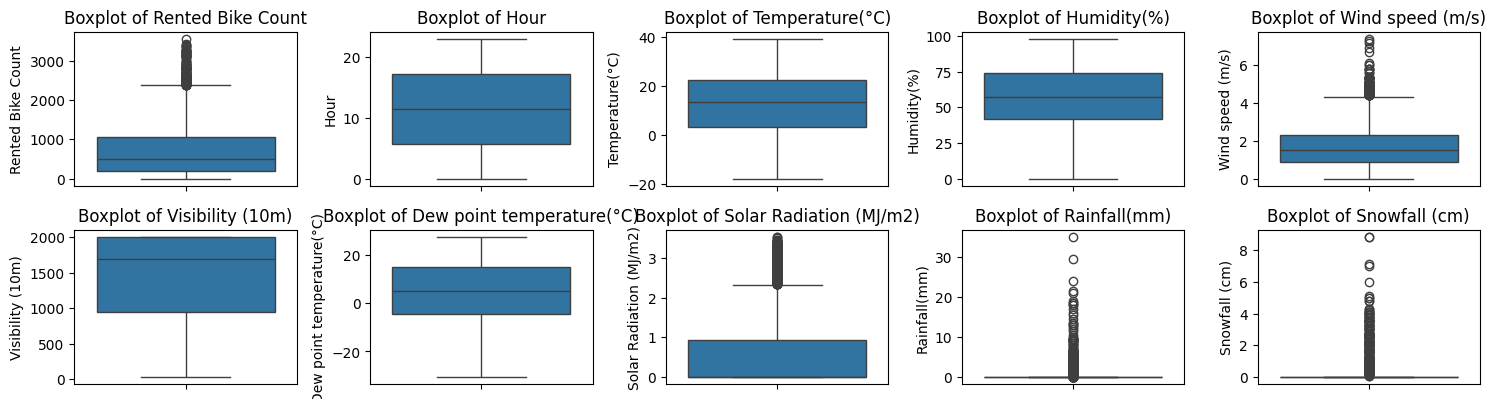

Jumlah outlier di setiap kolom:
Rented Bike Count          158
Wind speed (m/s)           161
Solar Radiation (MJ/m2)    641
Rainfall(mm)               528
Snowfall (cm)              443
dtype: int64


In [80]:
# Memilih hanya atribut numerik
numeric_cols = df.select_dtypes(include='number')

# Menghitung IQR untuk setiap kolom
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Mengidentifikasi outlier
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))

# Mengecek outliers dengan menggunakan boxplot
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Menampilkan jumlah outlier di setiap kolom
outlier_counts = outliers.sum()
print("Jumlah outlier di setiap kolom:")
print(outlier_counts[outlier_counts > 0])


- `Rented Bike Count`: Terdapat 158 outlier dalam kolom ini. Outlier pada kolom ini mungkin mencerminkan hari-hari dengan jumlah sewa sepeda yang jauh lebih tinggi atau lebih rendah dari biasanya.
  
- `Wind speed (m/s)`: Terdapat 161 outlier dalam kolom ini. Outlier dalam kecepatan angin bisa mencerminkan keadaan cuaca yang ekstrem di beberapa jam atau hari tertentu.

- `Solar Radiation (MJ/m2)`: Terdapat 641 outlier dalam kolom ini. Outlier dalam radiasi matahari bisa terjadi karena kondisi cuaca yang tidak biasa atau faktor lain yang mempengaruhi radiasi matahari.

- `Rainfall(mm)`: Terdapat 528 outlier dalam kolom ini. Outlier dalam curah hujan bisa terjadi saat terjadi badai atau kondisi cuaca ekstrem lainnya.

- `Snowfall (cm)`: Terdapat 443 outlier dalam kolom ini. Outlier dalam curah salju bisa terjadi pada musim salju yang intens atau kondisi cuaca yang ekstrem lainnya.


In [81]:
# Statistik Deskriptif
print("\nStatistik deskriptif:")
df.describe().transpose()


Statistik deskriptif:


,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


1.	Dari ringkasan statistik jumlah sepeda yang disewa per jam, dapat disimpulkan bahwa secara rata-rata, terdapat 704.60 sepeda yang disewa setiap jamnya. Standar deviasi sebesar 644.997 menunjukkan variasi yang signifikan dalam jumlah sepeda yang disewa, yang mencerminkan fluktuasi permintaan penyewaan. Dengan jumlah maksimum sepeda yang disewa mencapai 3556, kita bisa melihat adanya jam-jam tertentu dengan permintaan yang sangat tinggi. Memahami pola penyewaan ini dapat membantu dalam pengelolaan stok sepeda dan perencanaan operasional.
2.	Jam (Hour)
Dari statistik jam dalam sehari, rata-rata waktu penyewaan berada pada jam ke 11.5 (sekitar tengah hari). Standar deviasi sebesar 6.922 menunjukkan variasi waktu penyewaan yang luas sepanjang hari. Dengan persentil ke-25 pada 5.75 jam dan persentil ke-75 pada 17.25 jam, kita bisa melihat tren penyewaan mulai dari pagi hingga sore hari. Pola ini penting untuk menentukan waktu-waktu sibuk dan merencanakan kebutuhan operasional.
3.	Suhu dalam Celsius (Temperature(°C))
Rata-rata suhu saat penyewaan sepeda adalah 12.88°C, dengan standar deviasi 11.944°C yang menunjukkan variasi suhu yang cukup besar. Suhu minimum yang tercatat adalah -17.8°C dan maksimum adalah 39.4°C. Ini menunjukkan bahwa penyewaan sepeda terjadi dalam berbagai kondisi cuaca. Memahami pengaruh suhu terhadap penyewaan dapat membantu dalam perencanaan musim dan strategi pemasaran.
1.	Kelembapan dalam Persen (Humidity(%))
Rata-rata kelembapan adalah 58.23%, dengan standar deviasi sebesar 20.362%, menunjukkan variasi kelembapan yang signifikan. Kelembapan minimum tercatat pada 0% dan maksimum pada 98%. Ini menunjukkan penyewaan terjadi dalam berbagai kondisi kelembapan. Analisis lebih lanjut dapat membantu memahami apakah kelembapan mempengaruhi keputusan pelanggan untuk menyewa sepeda.
2.	Kecepatan Angin dalam m/s (Wind speed (m/s))
Rata-rata kecepatan angin adalah 1.725 m/s, dengan standar deviasi sebesar 1.036 m/s. Kecepatan angin maksimum yang tercatat adalah 7.4 m/s. Mengetahui pengaruh kecepatan angin terhadap penyewaan sepeda dapat membantu dalam memberikan informasi kepada pelanggan tentang kondisi cuaca yang mungkin mempengaruhi pengalaman bersepeda mereka.
3.	Jarak Pandang dalam 10m (Visibility (10m))
Rata-rata jarak pandang adalah 1436.83 unit (atau 14,368 meter), dengan standar deviasi sebesar 608.298 unit. Jarak pandang maksimum tercatat pada 2000 unit (atau 20,000 meter). Data ini penting untuk memahami bagaimana kondisi visibilitas mempengaruhi keputusan pelanggan untuk menyewa sepeda.
4.	Titik Embun dalam Celsius (Dew point temperature(°C))
Rata-rata suhu titik embun adalah 4.074°C, dengan standar deviasi sebesar 13.060°C. Titik embun minimum tercatat pada -30.6°C dan maksimum pada 27.2°C. Data ini memberikan wawasan tentang kondisi kelembapan udara pada saat penyewaan sepeda dan dapat mempengaruhi kenyamanan pengguna sepeda.
5.	Radiasi Matahari dalam MJ/m² (Solar Radiation (MJ/m2))
Rata-rata radiasi matahari adalah 0.569 MJ/m², dengan standar deviasi sebesar 0.869 MJ/m². Radiasi matahari maksimum tercatat pada 3.495 MJ/m². Memahami pengaruh radiasi matahari terhadap penyewaan sepeda dapat membantu dalam perencanaan strategi pemasaran dan operasional selama bulan-bulan dengan sinar matahari tinggi.
6.	Curah Hujan dalam mm (Rainfall(mm))
Rata-rata curah hujan adalah 0.149 mm, dengan standar deviasi sebesar 1.128 mm. Curah hujan maksimum tercatat pada 35.0 mm. Data ini penting untuk memahami bagaimana kondisi hujan mempengaruhi penyewaan sepeda dan perencanaan operasional dalam kondisi cuaca basah.
7.	Curah Salju dalam cm (Snowfall (cm))
Rata-rata curah salju adalah 0.075 cm, dengan standar deviasi sebesar 0.437 cm. Curah salju maksimum tercatat pada 8.8 cm. Mengetahui pengaruh salju terhadap penyewaan sepeda penting untuk perencanaan operasional selama bulan-bulan musim dingin.
Statistik ini memberikan ringkasan komprehensif dari data penyewaan sepeda dan kondisi cuaca, menunjukkan distribusi dan variabilitas dari setiap variabel dalam dataset.


# Penanganan

In [82]:
# Mengubah kolom Tanggal menjadi format datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Menambahkan kolom tambahan untuk analisis yang lebih baik
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Encode 'Seasons', 'Holiday', dan 'Functioning Day'
label_encoder = LabelEncoder()
df['Seasons'] = label_encoder.fit_transform(df['Seasons'])
df['Holiday'] = label_encoder.fit_transform(df['Holiday'])
df['Functioning Day'] = label_encoder.fit_transform(df['Functioning Day'])

# Menghapus kolom 'Date'
df = df.drop('Date', axis=1)

# Memeriksa dan Menangani Outliers
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df_cleaned = df.loc[~outliers].copy()

# Normalisasi Data
scaler = StandardScaler()
numerical_cols_cleaned = df_cleaned.select_dtypes(include=['float64', 'int64'])
df_cleaned[numerical_cols_cleaned.columns] = scaler.fit_transform(numerical_cols_cleaned)

# Menghapus kolom 'Rainfall(mm)' dan 'Snowfall (cm)' dari dataset
df_cleaned = df.drop(columns=['Rainfall(mm)', 'Snowfall (cm)'])

# Menampilkan data setelah diproses
df_cleaned.head()
df_cleaned.info()
df_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Seasons                    8760 non-null   int64  
 9   Holiday                    8760 non-null   int64  
 10  Functioning Day            8760 non-null   int64  
 11  Month                      8760 non-null   int32  
 12  Day                        8760 non-null   int32  
 13  DayOfWeek                  8760 non-null   int32

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Seasons,Holiday,Functioning Day,Month,Day,DayOfWeek
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,1.495890,0.950685,0.966324,6.526027,15.720548,3.002740
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.114408,0.216537,0.180404,3.448048,8.796749,1.998056
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,1.000000,1.000000,1.000000,4.000000,8.000000,1.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,1.000000,1.000000,1.000000,7.000000,16.000000,3.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,2.000000,1.000000,1.000000,10.000000,23.000000,5.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,3.000000,1.000000,1.000000,12.000000,31.000000,6.000000


1. Mengubah Kolom Tanggal menjadi Format Datetime
Tujuan: Mengubah kolom 'Date' menjadi format datetime untuk memudahkan manipulasi data berbasis waktu.
2. Menambahkan Kolom Tambahan untuk Analisis yang Lebih Baik
Tujuan: Menambahkan kolom 'Month', 'Day', dan 'DayOfWeek' untuk analisis pola berdasarkan bulan, hari, dan hari dalam seminggu.
3. Encode Kolom Kategorikal
Tujuan: Mengubah kolom kategorikal ('Seasons', 'Holiday', dan 'Functioning Day') menjadi format numerik untuk analisis dan pemodelan.
4. Menghapus Kolom 'Date'
Tujuan: Menghapus kolom 'Date' karena informasi waktu yang relevan telah diekstraksi ke kolom lain.
5. Mengganti Nilai Nol dengan Mean dari Kolom Tersebut
Tujuan: Mengganti nilai nol dalam kolom 'Rainfall(mm)' dan 'Snowfall (cm)' dengan mean dari masing-masing kolom untuk mengatasi nilai nol yang mungkin menunjukkan data yang hilang atau tidak tercatat.
6. Memeriksa dan Menangani Outliers
Tujuan: Mengidentifikasi dan menghapus outliers menggunakan metode Interquartile Range (IQR) untuk meningkatkan kualitas data.
7. Normalisasi Data
Tujuan: Menormalkan data numerik menggunakan StandardScaler untuk memastikan semua fitur berada dalam skala yang sama, yang penting untuk beberapa algoritma pembelajaran mesin.
8. Menghapus Kolom 'Rainfall(mm)' dan 'Snowfall (cm)' dari Dataset
Tujuan: Menghapus kolom 'Rainfall(mm)' dan 'Snowfall (cm)' setelah mengganti nilai nol dan normalisasi karena mereka mungkin tidak memberikan informasi tambahan yang signifikan untuk analisis lebih lanjut.
9. Menampilkan Data Setelah Diproses
Tujuan: Menampilkan beberapa baris pertama dari dataset yang sudah dibersihkan serta informasi umum dan statistik deskriptif untuk memverifikasi hasil preprocessing.

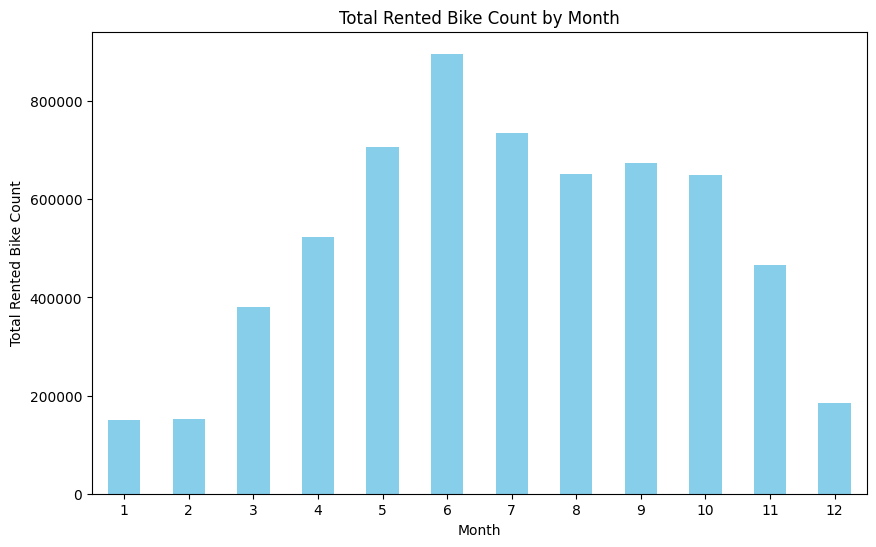

In [83]:
# Menghitung distribusi jumlah penyewaan sepeda per bulan
monthly_distribution = df.groupby('Month')['Rented Bike Count'].sum()

# Visualisasi
plt.figure(figsize=(10, 6))
monthly_distribution.plot(kind='bar', color='skyblue')
plt.title('Total Rented Bike Count by Month')
plt.xlabel('Month')
plt.ylabel('Total Rented Bike Count')
plt.xticks(rotation=0)
plt.show()

Chart di atas menunjukkan total penyewaan sepeda per bulan sepanjang tahun. Bulan Juni mencatat penyewaan tertinggi, melebihi 800.000, sedangkan Januari dan Desember memiliki penyewaan terendah, di bawah 200.000. Terdapat tren musiman yang jelas, dengan peningkatan penyewaan dari Januari hingga puncaknya di Juni, kemudian menurun dari Juli hingga Desember. Bulan April hingga Oktober menunjukkan aktivitas penyewaan tinggi, di atas 600.000. Ini mengindikasikan musim panas sebagai periode penyewaan sepeda paling aktif, sementara musim dingin lebih rendah.

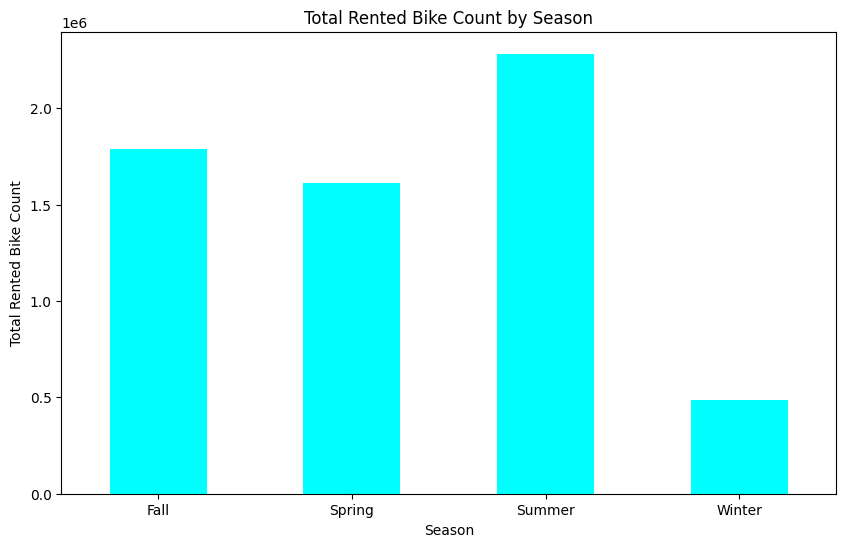

In [84]:
# Menambahkan kolom musim
df['Seasons'] = df['Month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                3: 'Spring', 4: 'Spring', 5: 'Spring',
                                6: 'Summer', 7: 'Summer', 8: 'Summer',
                                9: 'Fall', 10: 'Fall', 11: 'Fall'})
# Menghitung distribusi jumlah penyewaan sepeda per musim
seasonal_distribution = df.groupby('Seasons')['Rented Bike Count'].sum()

# Visualisasi
plt.figure(figsize=(10, 6))
seasonal_distribution.plot(kind='bar', color='cyan')
plt.title('Total Rented Bike Count by Season')
plt.xlabel('Season')
plt.ylabel('Total Rented Bike Count')
plt.xticks(rotation=0)
plt.show()

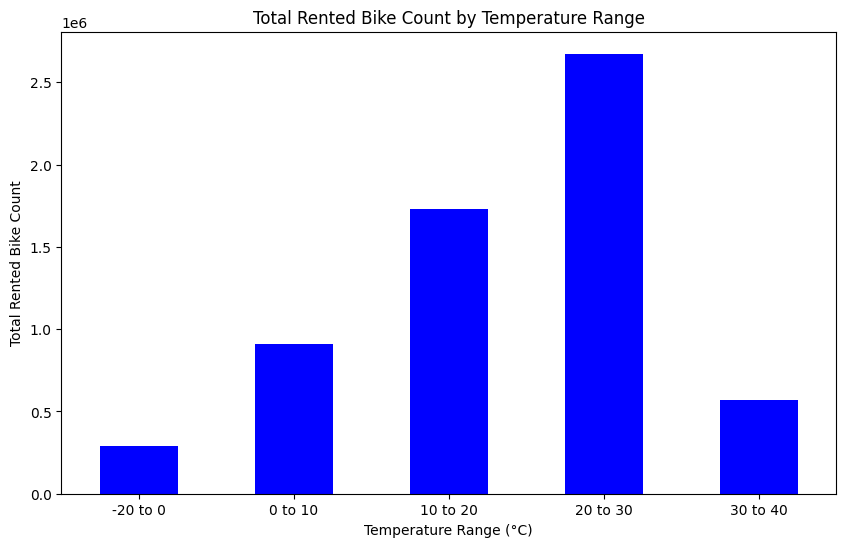

In [85]:
# Mengelompokkan suhu menjadi interval
bins = [-20, 0, 10, 20, 30, 40]
labels = ['-20 to 0', '0 to 10', '10 to 20', '20 to 30', '30 to 40']
df['Temp Range'] = pd.cut(df['Temperature(°C)'], bins=bins, labels=labels)

# Menghitung total jumlah penyewaan sepeda berdasarkan rentang suhu
temp_distribution = df.groupby('Temp Range')['Rented Bike Count'].sum()

# Visualisasi
plt.figure(figsize=(10, 6))
temp_distribution.plot(kind='bar', color='blue')
plt.title('Total Rented Bike Count by Temperature Range')
plt.xlabel('Temperature Range (°C)')
plt.ylabel('Total Rented Bike Count')
plt.xticks(rotation=0)
plt.show()

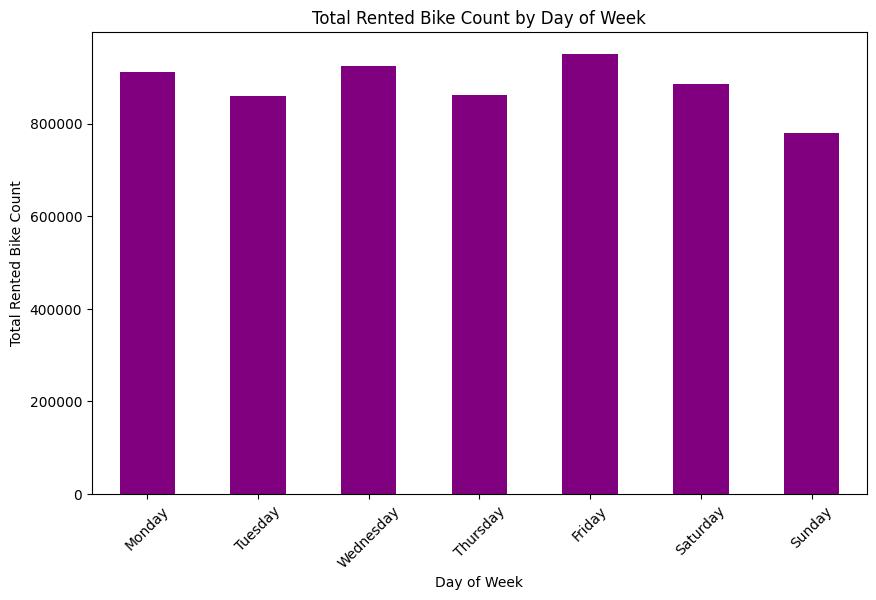

In [86]:
# Menghitung total jumlah penyewaan sepeda per hari dalam seminggu
weekly_distribution = df.groupby('DayOfWeek')['Rented Bike Count'].sum()

# Visualisasi
plt.figure(figsize=(10, 6))
weekly_distribution.plot(kind='bar', color='purple')
plt.title('Total Rented Bike Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Rented Bike Count')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.show()

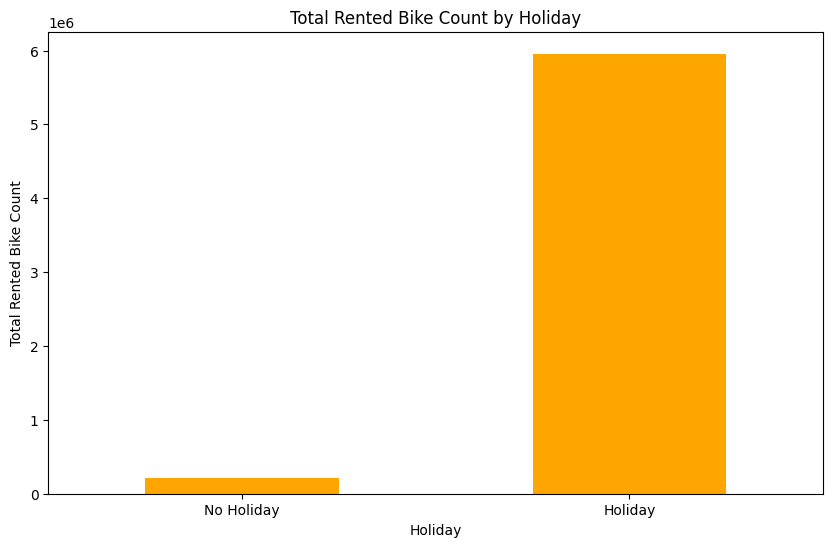

In [89]:
# Visualisasi distribusi penyewaan sepeda berdasarkan status hari libur
holiday_distribution = df_cleaned.groupby('Holiday')['Rented Bike Count'].sum()

# Visualisasi
plt.figure(figsize=(10, 6))
holiday_distribution.plot(kind='bar', color='orange')
plt.title('Total Rented Bike Count by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Total Rented Bike Count')
plt.xticks(ticks=[0, 1], labels=['No Holiday', 'Holiday'], rotation=0)
plt.show()

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = df_cleaned.corr()

# Visualisasi Heatmap Korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Melihat korelasi dengan 'Rented Bike Count'
bike_corr = correlation_matrix["Rented Bike Count"].sort_values(ascending=False)
print("Korelasi dengan 'Rented Bike Count':\n", bike_corr)

- Korelasi Positif:

'Temperature(°C)' memiliki korelasi positif tertinggi dengan 'Rented Bike Count', diikuti oleh 'Hour', 'Dew point temperature(°C)', dan 'Solar Radiation (MJ/m2)'.
'Functioning Day' dan 'Visibility (10m)' juga menunjukkan korelasi positif yang lebih kecil.

- Korelasi Negatif:

'DayOfWeek' , 'Humidity(%)' dan 'Seasons'  memiliki korelasi negatif yang signifikan dengan 'Rented Bike Count'.

In [ ]:
# Korelasi Positif
plt.figure(figsize=(15, 8))

# Subplot untuk Temperature(°C)
plt.subplot(2, 2, 1)
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count vs Temperature(°C)')
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')

# Subplot untuk Hour
plt.subplot(2, 2, 2)
hourly_data = df.groupby('Hour')['Rented Bike Count'].mean().reset_index()
sns.barplot(x='Hour', y='Rented Bike Count', data=hourly_data)
plt.title('Average Rented Bike Count by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Rented Bike Count')

# Subplot untuk Dew point temperature(°C)
plt.subplot(2, 2, 3)
sns.scatterplot(x='Dew point temperature(°C)', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count vs Dew Point Temperature(°C)')
plt.xlabel('Dew Point Temperature(°C)')
plt.ylabel('Rented Bike Count')

# Subplot untuk Solar Radiation (MJ/m2)
plt.subplot(2, 2, 4)
sns.scatterplot(x='Solar Radiation (MJ/m2)', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count vs Solar Radiation (MJ/m2)')
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Rented Bike Count')

plt.tight_layout()
plt.show()


1. Rented Bike Count vs Temperature(°C) (Kiri Atas)
- Deskripsi: Scatter plot ini menunjukkan hubungan antara suhu (Temperature(°C)) dan jumlah sepeda yang disewa (Rented Bike Count).
- Observasi: Terdapat korelasi positif antara suhu dan jumlah sepeda yang disewa. Ketika suhu meningkat, jumlah sepeda yang disewa juga cenderung meningkat, dengan puncaknya sekitar suhu 20-30°C.
- Analisis: Suhu yang lebih hangat cenderung meningkatkan kenyamanan bersepeda, sehingga meningkatkan jumlah penyewaan sepeda.
2. Average Rented Bike Count by Hour (Kanan Atas)
- Deskripsi: Bar chart ini menunjukkan rata-rata jumlah sepeda yang disewa setiap jam dalam sehari.
- Observasi: Terdapat puncak penyewaan sepeda pada pagi hari sekitar jam 8 dan pada sore hari sekitar jam 18.
- Analisis: Ini mencerminkan pola penggunaan sepeda untuk keperluan perjalanan kerja atau sekolah di pagi dan sore hari.
3. Rented Bike Count vs Dew Point Temperature(°C) (Kiri Bawah)
- Deskripsi: Scatter plot ini menunjukkan hubungan antara titik embun (Dew Point Temperature(°C)) dan jumlah sepeda yang disewa (Rented Bike Count).
- Observasi: Terdapat korelasi positif antara titik embun dan jumlah sepeda yang disewa. Ketika titik embun meningkat, jumlah sepeda yang disewa juga cenderung meningkat, dengan puncaknya sekitar titik embun 0-10°C.
- Analisis: Titik embun yang lebih tinggi biasanya menunjukkan kelembapan yang lebih tinggi, yang mungkin lebih nyaman untuk bersepeda dibandingkan dengan kondisi yang sangat kering atau sangat lembab.
4. Rented Bike Count vs Solar Radiation (MJ/m2) (Kanan Bawah)
- Deskripsi: Scatter plot ini menunjukkan hubungan antara radiasi matahari (Solar Radiation (MJ/m2)) dan jumlah sepeda yang disewa (Rented Bike Count).
- Observasi: Terdapat korelasi positif yang lemah antara radiasi matahari dan jumlah sepeda yang disewa. Jumlah penyewaan sepeda sedikit meningkat dengan peningkatan radiasi matahari hingga sekitar 1.5 MJ/m2, kemudian cenderung stabil.
- Analisis: Radiasi matahari yang lebih tinggi mungkin mencerminkan cuaca yang lebih cerah dan hangat, yang mendorong orang untuk bersepeda. Namun, radiasi yang terlalu tinggi mungkin juga tidak terlalu nyaman, sehingga jumlah penyewaan tidak terus meningkat.

In [ ]:
# Korelasi Negatif
plt.figure(figsize=(15, 8))

# Subplot untuk DayOfWeek
plt.subplot(2, 2, 3)
daily_data = df.groupby('DayOfWeek')['Rented Bike Count'].mean().reset_index()
sns.barplot(x='DayOfWeek', y='Rented Bike Count', data=daily_data)
plt.title('Average Rented Bike Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Rented Bike Count')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Subplot untuk Humidity(%)
plt.subplot(2, 2, 1)
sns.scatterplot(x='Humidity(%)', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count vs Humidity(%)')
plt.xlabel('Humidity(%)')
plt.ylabel('Rented Bike Count')

# Subplot untuk Seasons
plt.subplot(2, 2, 2)
season_data = df.groupby('Seasons')['Rented Bike Count'].mean().reset_index()
sns.barplot(x='Seasons', y='Rented Bike Count', data=season_data)
plt.title('Average Rented Bike Count by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Average Rented Bike Count')

plt.tight_layout()
plt.show()


1. Rented Bike Count vs Humidity(%) (Kiri Atas)
- Deskripsi: Scatter plot ini menunjukkan hubungan antara kelembapan (Humidity(%)) dan jumlah sepeda yang disewa (Rented Bike Count).
- Observasi: Terdapat korelasi negatif antara kelembapan dan jumlah sepeda yang disewa. Ketika kelembapan meningkat, jumlah sepeda yang disewa cenderung menurun.
- Analisis: Kelembapan yang tinggi mungkin membuat bersepeda menjadi tidak nyaman, sehingga mengurangi jumlah penyewaan sepeda.
2. Average Rented Bike Count by Seasons (Kanan Atas)
- Deskripsi: Bar chart ini menunjukkan rata-rata jumlah sepeda yang disewa berdasarkan musim (Seasons).
- Observasi: Musim semi (Season 2) memiliki jumlah penyewaan sepeda tertinggi, diikuti oleh musim gugur (Season 0) dan musim panas (Season 1). Musim dingin (Season 3) memiliki jumlah penyewaan sepeda terendah.
- Analisis: Musim semi dan musim gugur cenderung memiliki cuaca yang lebih nyaman untuk bersepeda dibandingkan dengan musim panas yang mungkin terlalu panas dan musim dingin yang terlalu dingin atau basah.
3. Average Rented Bike Count by Day of Week (Bawah)
- Deskripsi: Bar chart ini menunjukkan rata-rata jumlah sepeda yang disewa berdasarkan hari dalam seminggu (DayOfWeek).
- Observasi: Hari Rabu memiliki jumlah penyewaan sepeda tertinggi, sedangkan hari Minggu memiliki jumlah penyewaan sepeda terendah.
- Analisis: Variasi dalam jumlah penyewaan sepeda berdasarkan hari dalam seminggu dapat mencerminkan kebiasaan perjalanan dan aktivitas orang. Hari kerja, terutama di tengah minggu, mungkin lebih banyak digunakan untuk perjalanan kerja atau sekolah, sedangkan akhir pekan, terutama hari Minggu, mungkin lebih banyak digunakan untuk rekreasi yang berbeda.

Pemisahan Data

In [ ]:
# Pemisahan Data
selected_features = ['Temperature(°C)', 'Hour', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)',
                     'Functioning Day', 'Visibility (10m)', 'Month', 'Wind speed (m/s)']

X = df[selected_features]
y = df['Rented Bike Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menormalkan atau Menstandardisasi Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Pemisahan Data
1. **Pemilihan Fitur**
    - **selected_features**: Daftar fitur yang dipilih untuk digunakan dalam model. Fitur-fitur ini mencakup informasi cuaca, waktu, dan operasional hari, yang dianggap berpengaruh terhadap jumlah sepeda yang disewa.
    - **X**: Dataframe yang hanya berisi kolom-kolom fitur yang dipilih.
    - **y**: Kolom target yang berisi jumlah sepeda yang disewa (`Rented Bike Count`).

2. **Pemisahan Data**
    - **train_test_split(X, y, test_size=0.2, random_state=42)**: Fungsi ini digunakan untuk membagi dataset menjadi set pelatihan dan pengujian.
    - **test_size=0.2**: Menentukan bahwa 20% dari data akan digunakan untuk pengujian dan 80% untuk pelatihan.
    - **random_state=42**: Menetapkan seed untuk memastikan bahwa pembagian data konsisten setiap kali kode dijalankan. Ini berguna untuk reproduksi hasil.
    - **X_train**: Data fitur untuk pelatihan.
    - **X_test**: Data fitur untuk pengujian.
    - **y_train**: Data target untuk pelatihan.
    - **y_test**: Data target untuk pengujian.

#### Normalisasi atau Standardisasi Data
1. **StandardScaler**
    - **scaler**: Objek dari `StandardScaler` yang digunakan untuk menstandarisasi data. Standardisasi mengubah data sehingga memiliki mean 0 dan standar deviasi 1.
    - Standardisasi penting karena banyak algoritma machine learning bekerja lebih baik jika data memiliki skala yang seragam, terutama algoritma yang sensitif terhadap skala data seperti regresi linier dan K-Nearest Neighbors.

2. **Transformasi Data Pelatihan**
    - **fit_transform(X_train)**: Menerapkan standardisasi pada data pelatihan. Fungsi ini menghitung mean dan varians dari data pelatihan, kemudian mengaplikasikan transformasi tersebut pada data pelatihan untuk menstandarisasinya.
    - **X_train_scaled**: Data pelatihan yang telah distandarisasi.

3. **Transformasi Data Pengujian**
    - **transform(X_test)**: Menerapkan transformasi yang sama pada data pengujian. Ini menggunakan mean dan varians yang dihitung dari data pelatihan untuk memastikan konsistensi.
    - **X_test_scaled**: Data pengujian yang telah distandarisasi.

### Tujuan

1. **Pemisahan Data**
   - Memisahkan data menjadi set pelatihan dan pengujian memungkinkan evaluasi performa model secara objektif. Ini membantu memastikan bahwa model dapat menggeneralisasi dengan baik pada data baru yang belum pernah dilihat sebelumnya.

2. **Normalisasi/Standardisasi Data**
   - Menstandarisasi data memastikan bahwa semua fitur memiliki skala yang sama, yang penting untuk banyak algoritma machine learning yang sensitif terhadap skala data. Ini membantu dalam meningkatkan kinerja model dan memastikan fitur dengan skala besar tidak mendominasi fitur dengan skala kecil.



In [ ]:
# Penerapan Model Random Forest
# Untuk klasifikasi, ubah target menjadi biner (high demand vs low demand)
threshold = y.mean()
y_train_bin = (y_train > threshold).astype(int)
y_test_bin = (y_test > threshold).astype(int)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_bin)
rf_y_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test_bin, rf_y_pred)
rf_report = classification_report(y_test_bin, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test_bin, rf_y_pred)

print(f'Random Forest Accuracy: {rf_accuracy}')
print('Random Forest Classification Report:')
print(rf_report)
print('Random Forest Confusion Matrix:')
print(rf_conf_matrix)



#### Akurasi
- **Akurasi**: Angka ini menunjukkan bahwa model Random Forest memiliki akurasi sebesar 91.15%, yang berarti model berhasil mengklasifikasikan 91.15% dari sampel pengujian dengan benar.

#### Classification Report
- **Precision, Recall, F1-Score**:
  - **Class 0** (Tidak Tinggi Permintaan):
    - **Precision**: 0.93 - Dari semua prediksi kelas 0, 93% benar.
    - **Recall**: 0.93 - Dari semua sampel sebenarnya di kelas 0, 93% berhasil terdeteksi dengan benar.
    - **F1-Score**: 0.93 - Rata-rata harmonis dari precision dan recall, memberikan ukuran keseimbangan antara keduanya.
    - **Support**: 1064 - Jumlah sampel yang sebenarnya berada di kelas 0.

  - **Class 1** (Tinggi Permintaan):
    - **Precision**: 0.89 - Dari semua prediksi kelas 1, 89% benar.
    - **Recall**: 0.89 - Dari semua sampel sebenarnya di kelas 1, 89% berhasil terdeteksi dengan benar.
    - **F1-Score**: 0.89 - Rata-rata harmonis dari precision dan recall, memberikan ukuran keseimbangan antara keduanya.
    - **Support**: 688 - Jumlah sampel yang sebenarnya berada di kelas 1.

- **Overall Accuracy**: 0.91 - Akurasi keseluruhan model pada dataset pengujian.

- **Macro Average**:
  - **Precision**: 0.91 - Rata-rata precision dari kedua kelas.
  - **Recall**: 0.91 - Rata-rata recall dari kedua kelas.
  - **F1-Score**: 0.91 - Rata-rata F1-score dari kedua kelas.
  - **Catatan**: Macro average memperlakukan setiap kelas secara sama tanpa memperhatikan jumlah sampel di setiap kelas.

- **Weighted Average**:
  - **Precision**: 0.91 - Precision keseluruhan dengan mempertimbangkan jumlah sampel di setiap kelas.
  - **Recall**: 0.91 - Recall keseluruhan dengan mempertimbangkan jumlah sampel di setiap kelas.
  - **F1-Score**: 0.91 - F1-score keseluruhan dengan mempertimbangkan jumlah sampel di setiap kelas.
  - **Catatan**: Weighted average memberikan bobot lebih pada kelas dengan lebih banyak sampel.

#### Confusion Matrix
- **True Positives (TP)**: 611 - Jumlah sampel dari kelas 1 yang diprediksi dengan benar.
- **True Negatives (TN)**: 986 - Jumlah sampel dari kelas 0 yang diprediksi dengan benar.
- **False Positives (FP)**: 78 - Jumlah sampel dari kelas 0 yang salah diprediksi sebagai kelas 1.
- **False Negatives (FN)**: 77 - Jumlah sampel dari kelas 1 yang salah diprediksi sebagai kelas 0.

#### Ringkasan
- Model Random Forest menunjukkan performa yang baik dengan akurasi 91.15%.
- Model memiliki precision dan recall yang tinggi untuk kedua kelas, dengan sedikit lebih tinggi untuk kelas 0 dibandingkan kelas 1.
- Confusion Matrix menunjukkan bahwa model memiliki jumlah kesalahan prediksi yang relatif kecil dibandingkan dengan jumlah total sampel, baik untuk false positives maupun false negatives.

Secara keseluruhan, model Random Forest ini cukup efektif dalam mengklasifikasikan permintaan sewa sepeda, dengan keseimbangan yang baik antara precision, recall, dan f1-score untuk kedua kelas.

In [ ]:
# Penerapan Model Logistic Regression

# Meningkatkan Jumlah Iterasi dan Menggunakan Solver yang Berbeda
lr_model = LogisticRegression(random_state=42, max_iter=200, solver='liblinear')
lr_model.fit(X_train_scaled, y_train_bin)
lr_y_pred = lr_model.predict(X_test_scaled)

# Evaluasi Model
lr_accuracy = accuracy_score(y_test_bin, lr_y_pred)
lr_report = classification_report(y_test_bin, lr_y_pred)
lr_conf_matrix = confusion_matrix(y_test_bin, lr_y_pred)

print(f'Logistic Regression Accuracy: {lr_accuracy}')
print('Logistic Regression Classification Report:')
print(lr_report)
print('Logistic Regression Confusion Matrix:')
print(lr_conf_matrix)

#### Akurasi
- **Akurasi**: Angka ini menunjukkan bahwa model Logistic Regression memiliki akurasi sebesar 84.93%, yang berarti model berhasil mengklasifikasikan 84.93% dari sampel pengujian dengan benar.

#### Classification Report
- **Precision, Recall, F1-Score**:
  - **Class 0** (Tidak Tinggi Permintaan):
    - **Precision**: 0.86 - Dari semua prediksi kelas 0, 86% benar.
    - **Recall**: 0.89 - Dari semua sampel sebenarnya di kelas 0, 89% berhasil terdeteksi dengan benar.
    - **F1-Score**: 0.88 - Rata-rata harmonis dari precision dan recall, memberikan ukuran keseimbangan antara keduanya.
    - **Support**: 1064 - Jumlah sampel yang sebenarnya berada di kelas 0.

  - **Class 1** (Tinggi Permintaan):
    - **Precision**: 0.83 - Dari semua prediksi kelas 1, 83% benar.
    - **Recall**: 0.78 - Dari semua sampel sebenarnya di kelas 1, 78% berhasil terdeteksi dengan benar.
    - **F1-Score**: 0.80 - Rata-rata harmonis dari precision dan recall, memberikan ukuran keseimbangan antara keduanya.
    - **Support**: 688 - Jumlah sampel yang sebenarnya berada di kelas 1.

- **Overall Accuracy**: 0.85 - Akurasi keseluruhan model pada dataset pengujian.

- **Macro Average**:
  - **Precision**: 0.84 - Rata-rata precision dari kedua kelas.
  - **Recall**: 0.84 - Rata-rata recall dari kedua kelas.
  - **F1-Score**: 0.84 - Rata-rata F1-score dari kedua kelas.
  - **Catatan**: Macro average memperlakukan setiap kelas secara sama tanpa memperhatikan jumlah sampel di setiap kelas.

- **Weighted Average**:
  - **Precision**: 0.85 - Precision keseluruhan dengan mempertimbangkan jumlah sampel di setiap kelas.
  - **Recall**: 0.85 - Recall keseluruhan dengan mempertimbangkan jumlah sampel di setiap kelas.
  - **F1-Score**: 0.85 - F1-score keseluruhan dengan mempertimbangkan jumlah sampel di setiap kelas.
  - **Catatan**: Weighted average memberikan bobot lebih pada kelas dengan lebih banyak sampel.

#### Confusion Matrix
- **True Positives (TP)**: 536 - Jumlah sampel dari kelas 1 yang diprediksi dengan benar.
- **True Negatives (TN)**: 952 - Jumlah sampel dari kelas 0 yang diprediksi dengan benar.
- **False Positives (FP)**: 112 - Jumlah sampel dari kelas 0 yang salah diprediksi sebagai kelas 1.
- **False Negatives (FN)**: 152 - Jumlah sampel dari kelas 1 yang salah diprediksi sebagai kelas 0.

#### Ringkasan
- Model Logistic Regression menunjukkan performa yang baik dengan akurasi 84.93%.
- Model memiliki precision dan recall yang cukup tinggi untuk kedua kelas, dengan sedikit lebih tinggi untuk kelas 0 dibandingkan kelas 1.
- Confusion Matrix menunjukkan bahwa model memiliki jumlah kesalahan prediksi yang moderat, baik untuk false positives maupun false negatives.

Secara keseluruhan, model Logistic Regression ini cukup efektif dalam mengklasifikasikan permintaan sewa sepeda, dengan keseimbangan yang baik antara precision, recall, dan f1-score untuk kedua kelas. Namun, model Random Forest lebih unggul dalam hal akurasi dan metrik lainnya.

In [ ]:
# Penerapan Model K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train_bin)
knn_y_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test_bin, knn_y_pred)
knn_report = classification_report(y_test_bin, knn_y_pred)
knn_conf_matrix = confusion_matrix(y_test_bin, knn_y_pred)

print(f'KNN Accuracy: {knn_accuracy}')
print('KNN Classification Report:')
print(knn_report)
print('KNN Confusion Matrix:')
print(knn_conf_matrix)

#### Akurasi
- **Akurasi**: Angka ini menunjukkan bahwa model KNN memiliki akurasi sebesar 81.85%, yang berarti model berhasil mengklasifikasikan 81.85% dari sampel pengujian dengan benar.

#### Classification Report
- **Precision, Recall, F1-Score**:
  - **Class 0** (Tidak Tinggi Permintaan):
    - **Precision**: 0.85 - Dari semua prediksi kelas 0, 85% benar.
    - **Recall**: 0.86 - Dari semua sampel sebenarnya di kelas 0, 86% berhasil terdeteksi dengan benar.
    - **F1-Score**: 0.85 - Rata-rata harmonis dari precision dan recall, memberikan ukuran keseimbangan antara keduanya.
    - **Support**: 1064 - Jumlah sampel yang sebenarnya berada di kelas 0.

  - **Class 1** (Tinggi Permintaan):
    - **Precision**: 0.77 - Dari semua prediksi kelas 1, 77% benar.
    - **Recall**: 0.76 - Dari semua sampel sebenarnya di kelas 1, 76% berhasil terdeteksi dengan benar.
    - **F1-Score**: 0.77 - Rata-rata harmonis dari precision dan recall, memberikan ukuran keseimbangan antara keduanya.
    - **Support**: 688 - Jumlah sampel yang sebenarnya berada di kelas 1.

- **Overall Accuracy**: 0.82 - Akurasi keseluruhan model pada dataset pengujian.

- **Macro Average**:
  - **Precision**: 0.81 - Rata-rata precision dari kedua kelas.
  - **Recall**: 0.81 - Rata-rata recall dari kedua kelas.
  - **F1-Score**: 0.81 - Rata-rata F1-score dari kedua kelas.
  - **Catatan**: Macro average memperlakukan setiap kelas secara sama tanpa memperhatikan jumlah sampel di setiap kelas.

- **Weighted Average**:
  - **Precision**: 0.82 - Precision keseluruhan dengan mempertimbangkan jumlah sampel di setiap kelas.
  - **Recall**: 0.82 - Recall keseluruhan dengan mempertimbangkan jumlah sampel di setiap kelas.
  - **F1-Score**: 0.82 - F1-score keseluruhan dengan mempertimbangkan jumlah sampel di setiap kelas.
  - **Catatan**: Weighted average memberikan bobot lebih pada kelas dengan lebih banyak sampel.

#### Confusion Matrix
- **True Positives (TP)**: 523 - Jumlah sampel dari kelas 1 yang diprediksi dengan benar.
- **True Negatives (TN)**: 911 - Jumlah sampel dari kelas 0 yang diprediksi dengan benar.
- **False Positives (FP)**: 153 - Jumlah sampel dari kelas 0 yang salah diprediksi sebagai kelas 1.
- **False Negatives (FN)**: 165 - Jumlah sampel dari kelas 1 yang salah diprediksi sebagai kelas 0.

#### Ringkasan
- Model KNN menunjukkan performa yang cukup baik dengan akurasi 81.85%.
- Precision dan recall lebih tinggi untuk kelas 0 dibandingkan kelas 1, menunjukkan model lebih baik dalam mengklasifikasikan sampel yang tidak memiliki permintaan tinggi.
- Confusion Matrix menunjukkan bahwa model memiliki jumlah kesalahan prediksi yang moderat, baik untuk false positives maupun false negatives.

Secara keseluruhan, model KNN ini cukup efektif dalam mengklasifikasikan permintaan sewa sepeda, namun kurang efektif dibandingkan dengan model Random Forest dan Logistic Regression dalam hal akurasi dan metrik lainnya.

In [ ]:
# Visualisasi Pentingnya Fitur dari Random Forest
def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title('Feature Importances')
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.show()

plot_feature_importance(rf_model, X.columns)

- Kesimpulan:
Model Terbaik: Model Random Forest memiliki akurasi tertinggi dalam memprediksi jumlah penyewaan sepeda.
- Faktor-Faktor Penting: Faktor-faktor seperti suhu (Temperature(°C)), titik embun (Dew point temperature(°C)), dan jam (Hour) adalah yang paling berpengaruh terhadap jumlah penyewaan sepeda.
Pengaruh Musiman dan Harian: Pengaruh musiman dan variasi harian juga signifikan dalam pola penyewaan sepeda.
- Rekomendasi:
1. Pengelolaan Sumber Daya: Meningkatkan alokasi sepeda pada waktu-waktu dan hari-hari dengan permintaan tinggi, berdasarkan hasil prediksi.
2. Perencanaan Cuaca: Mempertimbangkan kondisi cuaca seperti suhu dan titik embun dalam perencanaan penyewaan sepeda.
3. Kebijakan Musiman: Menerapkan kebijakan musiman untuk mengoptimalkan penggunaan sepeda selama musim dengan permintaan rendah.